#Simulation_OLP

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import math


import Simulation_OLP
from Simulation_OLP import *
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

#from importlib import reload
#package_DBR = reload (package_DBR)

In [53]:
nameFile = 'Data/Cleaned_data_Open_loop_experiment_on_MV_2024-03-18-09h21.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv(nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)  

MV


In [54]:
nameFile = 'Cleaned_data_Open_loop_experiment_on_DV_2024-03-18-15h43.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm_DV = data['tm'].values
    DVm = data['DVm'].values 
    PVm_DV = data['PVm'].values
     
print(ExpVariable)  

DV


In [55]:
Kp_ODV_FOPDT = 0.23022209108867475
T_ODV_FOPDT = 237.8306621624281
theta_ODV_FOPDT = 55.192189890517064

Kp_ODV_SOPDT: 0.22940157900053862
T1_ODV_SOPDT: 235.05979493875853
T2_ODV_SOPDT: 4.990264278507082
theta_ODV_SOPDT: 50.462409314789745




In [56]:
MV_OPT_K = 0.40720379221328497
MV_OPT_T1 = 150.244751745076
MV_OPT_T2 = 2.7537595851490773
MV_OPT_Theta = 6.0000967940382


In [57]:
help(initialize_constants)

Help on function initialize_constants in module Simulation_OLP:

initialize_constants()
    Initializes and returns the constants Tu, Tg, Kp, a, t1, t2 used in the control theory laboratory.
    Usage : Tu, Tg, Kp, a, t1, t2 = initialize_constants()
    
    Returns:
    Tu (float): Ultimate period.
    Tg (float): Ultimate gain.
    Kp (float): Process gain.
    a (float): Constant a.
    t1 (float): Constant t1.
    t2 (float): Constant t2.
    
    which are obtained from the open loop process transfer function grphcally.



In [58]:
Tu, Tg, Kp, a, t1, t2 = initialize_constants()
print('Tu =', Tu, 'Tg =', Tg, 'Kp =', Kp, 'a =', a, 't1 =', t1, 't2 =', t2)

Tu = 14.0 Tg = 154.0 Kp = 0.391 a = 13.0 t1 = 58.0 t2 = 85.0


In [59]:
TSim = 720  # Simulation Time [s]
Ts = 1.0    # Sampling Period [s]
N = int(TSim / Ts) + 1

t = np.linspace(0, TSim, N)

MV = []
MVPath = {0: 0, 1: 1, TSim: 1}

SelectPath_RT(MVPath, t, MV)


In [60]:
help(Broida1)

Help on function Broida1 in module Simulation_OLP:

Broida1()
    create step response of the system defined by the transfer function Pb(s) = (Kp*e^(-theta*s))/(Ts+1)
    with T=Tg and theta = Tu.
    
    Parameters:



In [61]:
T_B1 = Tg 
theta_B1 = Tu

In [62]:
T_B2 = 5.5*(t2 - t1) 
theta_B2 = (2.8*t1) - (1.8*t2)

In [63]:
ratio = Tu/Tg

#Computation of Strejc model parameters
table_a = {1 : 0, 2 : 0.1, 3 : 0.22, 4 : 0.32, 5 : 0.41, 6 : 0.49, 7 : 0.57}
table_b = {1 : 1, 2 : 2.72, 3 : 3.69, 4 : 4.46, 5 : 5.12, 6 : 5.7, 7 : 6.23} 

#Order
n = 0

for key, value in table_a.items() : 
    if value <= ratio and ratio < table_a[key+1] :
        n = key

a_n = table_a[n]
b_n = table_b[n]

T_T = Tg / b_n
T_u_th_T = a_n * Tg
theta_T = Tu - T_u_th_T

base_T = Ts + 1

In [64]:
T1_VDG = Tg * (3 * a * np.exp(1) - 1)/(1 + a * np.exp(1))
T2_VDG = Tg*(1-a*np.exp(1))/(1+a*np.exp(1))
theta_VDG = Tu - (T1_VDG*T2_VDG)/(T1_VDG + 3*T2_VDG)

print(f'van der Grinten : T1 = {T1_VDG}, T2 = {T2_VDG}, theta = {theta_VDG}')

van der Grinten : T1 = 445.0478920191586, T2 = -145.52394600957928, theta = 7654.952438843296


In [65]:
nameFile = 'Cleaned_data_Open_loop_experiment_on_MV_2024-03-18-09h21.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
     
print(ExpVariable)  

MV


(0.0, 573.0)

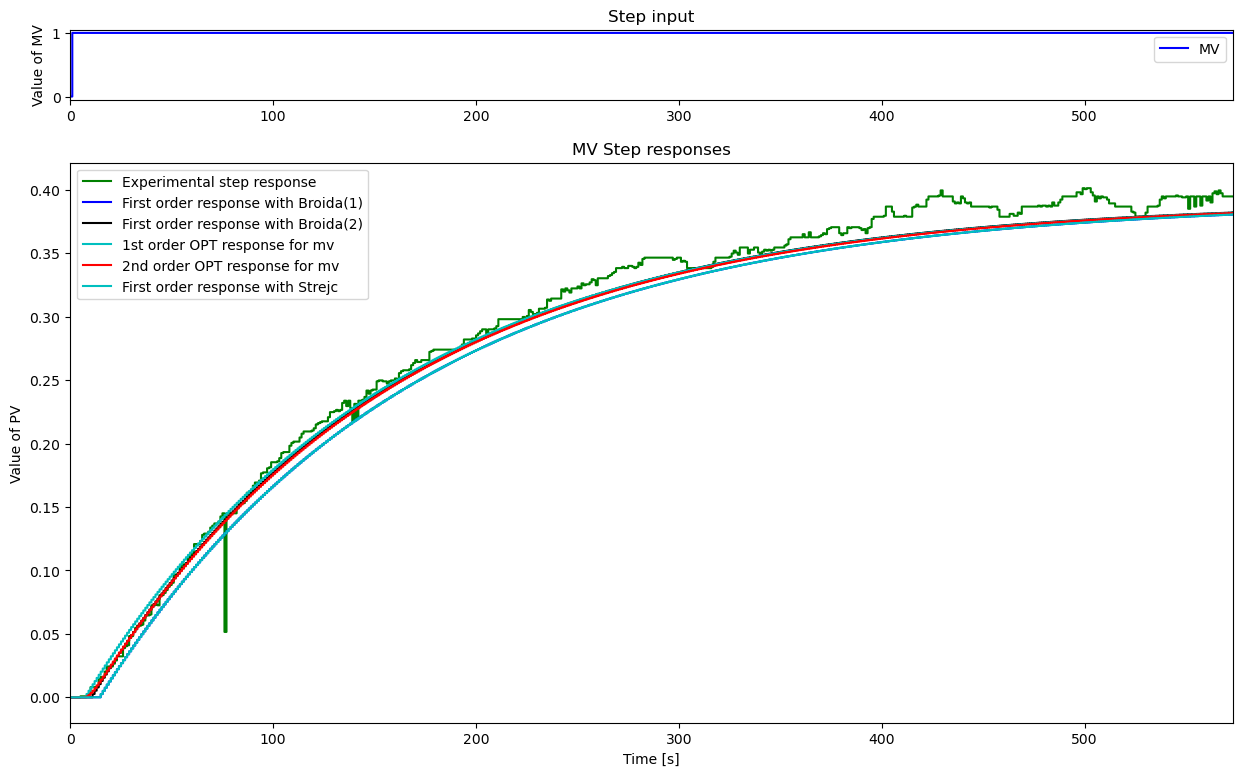

In [66]:
FOPDT_P_B1 = FOPDT(MVm, Kp, T_B1, theta_B1, Ts)
FOPDT_P_B2 = FOPDT(MVm, Kp, T_B2, theta_B2, Ts)
FOPDT_P_T = FOPDT(MVm, Kp, T_T, theta_T, Ts)
#SOPDT_P_VDG = SOPDT(MVm, Kp, T1_VDG, T2_VDG, theta_VDG, Ts)
SODPT_OPT_1st = FOPDT(MVm, Kp,MV_OPT_T1, MV_OPT_Theta, Ts)
SOPDT_OPT_2nd = SOPDT(MVm,Kp,MV_OPT_T1,MV_OPT_T2,MV_OPT_Theta,Ts)

fig, axs = plt.subplots(2, 1, figsize=(15, 9), gridspec_kw={'height_ratios': [1, 8]})

axs[0].step(tm, MVm, 'b-', label='MV', where='post')
axs[0].set_ylabel('Value of MV')
axs[0].set_title('Step input')
axs[0].legend(loc='best')
axs[0].set_xlim([0, np.max(tm)])

axs[1].step(tm, PVm, 'g-', label='Experimental step response', where='post')
#axs[1].step(tm, PV_OMV_FOPDT, 'cyan', label='First order response with optimal parameters', where='post')
#axs[1].step(tm, PV_OMV_SOPDT, 'lime', label='Second order response with optimal parameters', where='post')
axs[1].step(tm, FOPDT_P_B1, 'b-', label='First order response with Broida(1)', where='post')
axs[1].step(tm, FOPDT_P_B2, 'k-', label='First order response with Broida(2)', where='post')
axs[1].step(tm, SODPT_OPT_1st, 'c-', label='1st order OPT response for mv', where='post')
axs[1].step(tm, SOPDT_OPT_2nd, 'r-', label='2nd order OPT response for mv', where='post')
#axs[1].step(tm, PV_G, 'r-', label='Second order response with van der Grinten', where='post')
axs[1].step(tm, FOPDT_P_T, 'c-', label='First order response with Strejc', where='post')
axs[1].set_ylabel('Value of PV')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('MV Step responses')
axs[1].legend(loc='best')
axs[1].set_xlim([0, np.max(tm)])

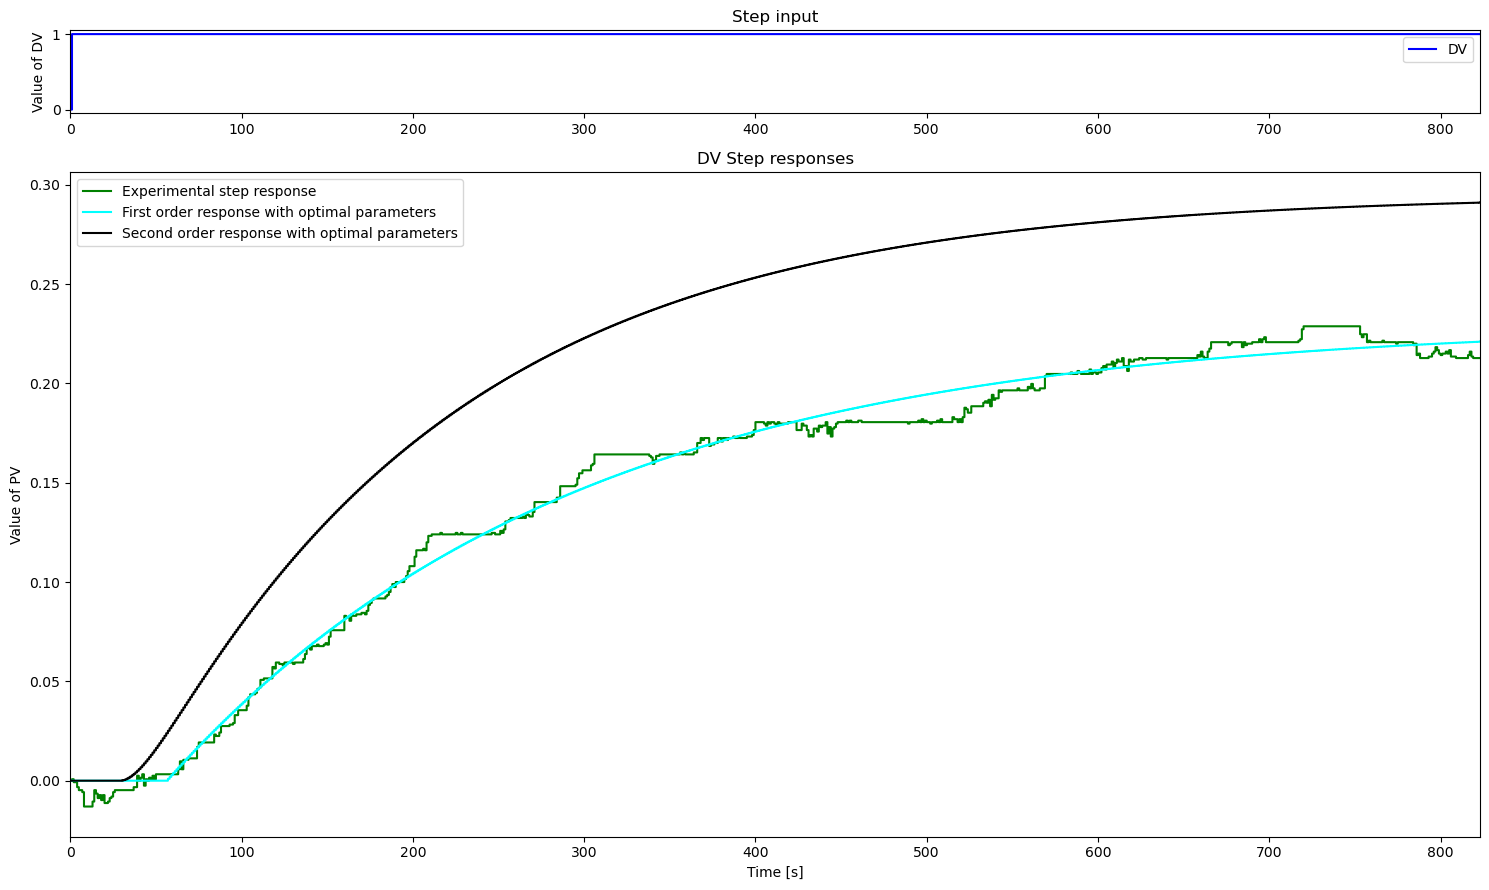

In [67]:

#Process values
PV_ODV_FOPDT = FOPDT(DVm, Kp_ODV_FOPDT, T_ODV_FOPDT, theta_ODV_FOPDT, Ts)
PV_ODV_SOPDT = SOPDT(DVm, Kp_ODV_SOPDT, T1_ODV_SOPDT, T2_ODV_SOPDT, theta_ODV_SOPDT, Ts)

fig, axs = plt.subplots(2, 1, figsize=(15, 9), gridspec_kw={'height_ratios': [1, 8]})

axs[0].step(tm_DV, DVm, 'b-', label='DV', where='post')
axs[0].set_ylabel('Value of DV')
axs[0].set_title('Step input')
axs[0].legend(loc='best')
axs[0].set_xlim([0, np.max(tm_DV)])

axs[1].step(tm_DV, PVm_DV, 'g-', label='Experimental step response', where='post')
axs[1].step(tm_DV, PV_ODV_FOPDT, 'cyan', label='First order response with optimal parameters', where='post')
axs[1].step(tm_DV, PV_ODV_SOPDT, 'k', label='Second order response with optimal parameters', where='post')
axs[1].set_ylabel('Value of PV')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('DV Step responses')
axs[1].legend(loc='best')
axs[1].set_xlim([0, np.max(tm_DV)])

fig.tight_layout()

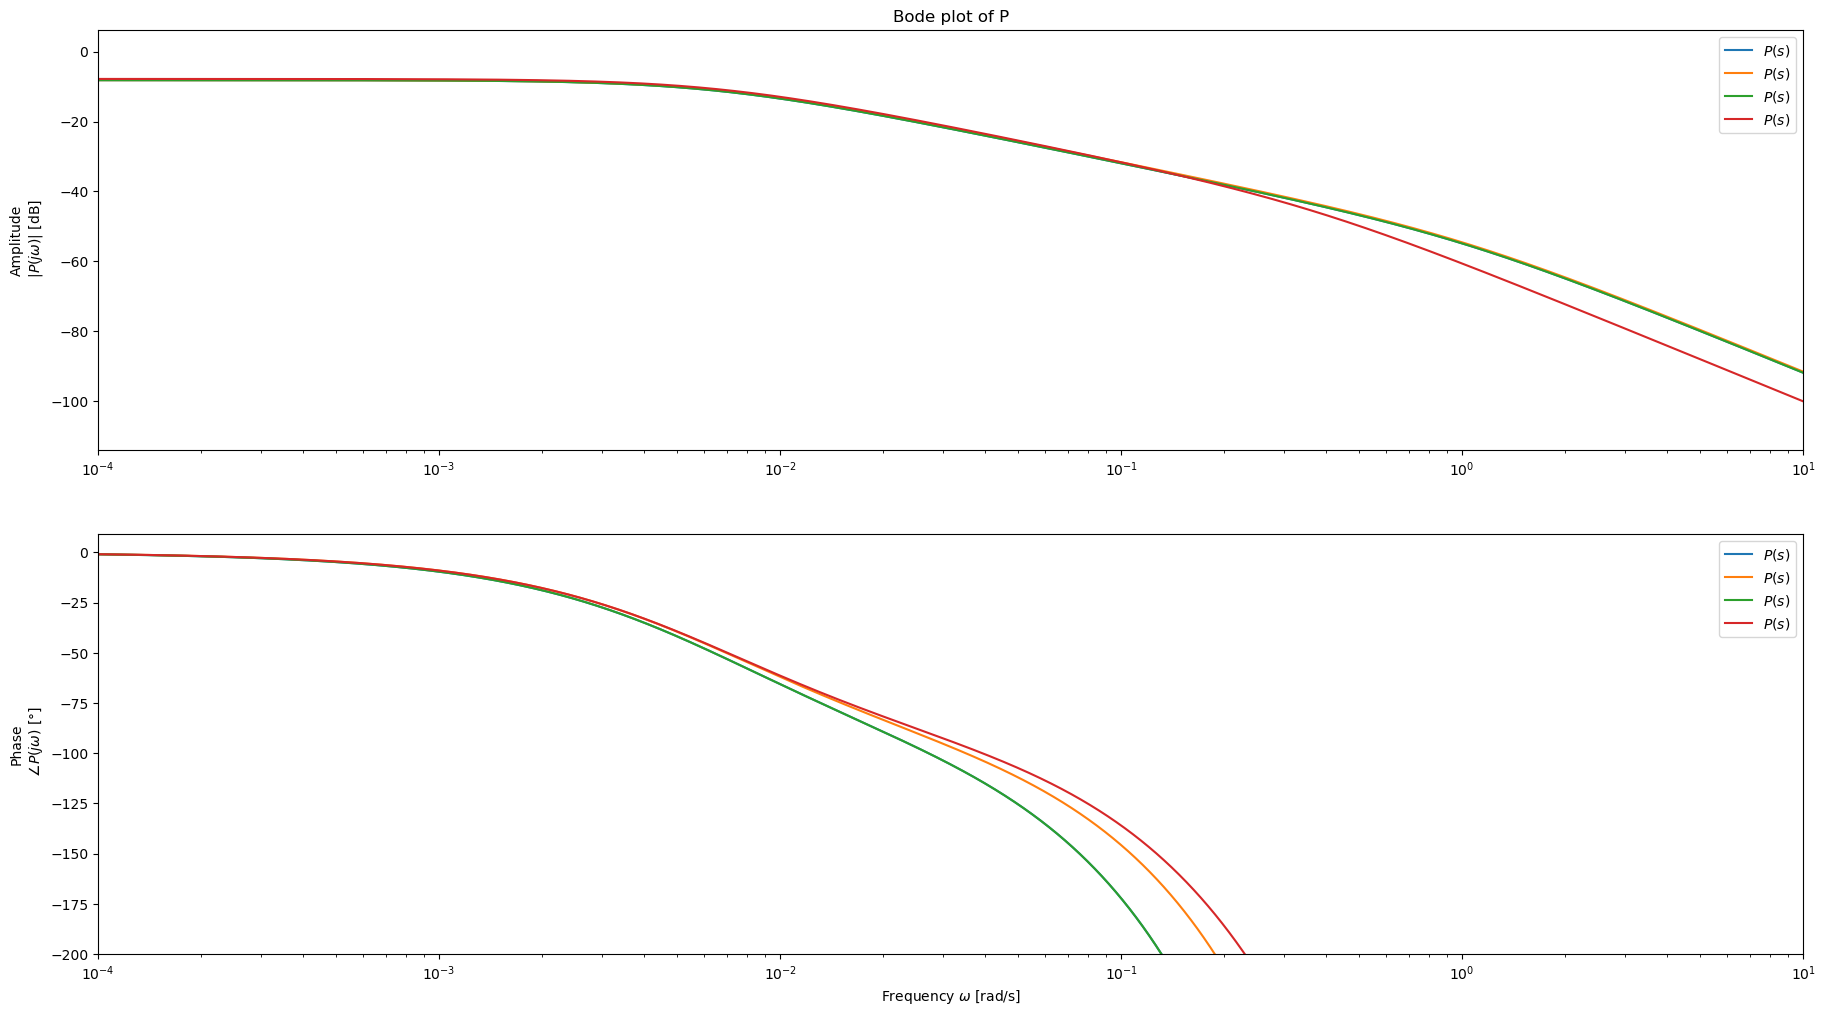

In [68]:
P = Process({}) # Default process = unit gain

# Parameters for input-output dynamics P(s)
P.parameters['Kp'] = Kp
P.parameters['Tlag1'] = T_B1
P.parameters['Tlag2'] = 1.0
P.parameters['theta'] = theta_B1

omega = np.logspace(-4, 1, 10000)

P1 = Bode(P,omega,False)

P = Process({}) # Default process = unit gain

# Parameters for input-output dynamics P(s)
P.parameters['Kp'] = Kp
P.parameters['Tlag1'] = T_B2
P.parameters['Tlag2'] = 1.0
P.parameters['theta'] = theta_B2

omega = np.logspace(-4, 1, 10000)

P2 = Bode(P,omega,False)

P = Process({}) # Default process = unit gain

# Parameters for input-output dynamics P(s)
P.parameters['Kp'] = Kp
P.parameters['Tlag1'] = T_T
P.parameters['Tlag2'] = 1.0
P.parameters['theta'] = theta_T

omega = np.logspace(-4, 1, 10000)

P3 = Bode(P,omega,False)

P = Process({}) # Default process = unit gain

# Parameters for input-output dynamics P(s)
P.parameters['Kp'] = MV_OPT_K
P.parameters['Tlag1'] = MV_OPT_T1
P.parameters['Tlag2'] = MV_OPT_T2
P.parameters['theta'] = MV_OPT_Theta

omega = np.logspace(-4, 1, 10000)

P4 = Bode(P,omega,False)

fig, (ax_gain, ax_phase) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)

# Gain part
ax_gain.semilogx(omega,20*np.log10(np.abs(P1)),label=r'$P(s)$')   
gain_min = np.min(20*np.log10(np.abs(P1)/5))
gain_max = np.max(20*np.log10(np.abs(P1)*5))
ax_gain.set_xlim([np.min(omega), np.max(omega)])
ax_gain.set_ylim([gain_min, gain_max])
ax_gain.set_ylabel('Amplitude' + '\n $|P(j\omega)|$ [dB]')
ax_gain.set_title('Bode plot of P')
ax_gain.legend(loc='best')

# Phase part
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(P1)),label=r'$P(s)$')   
ax_phase.set_xlim([np.min(omega), np.max(omega)])
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(P1))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(P1))) + 10
ax_phase.set_ylim([np.max([ph_min, -200]), ph_max])
ax_phase.set_xlabel(r'Frequency $\omega$ [rad/s]')        
ax_phase.set_ylabel('Phase' + '\n $\,$'  + r'$\angle P(j\omega)$ [°]')
ax_phase.legend(loc='best')

# Gain part
ax_gain.semilogx(omega,20*np.log10(np.abs(P2)),label=r'$P(s)$')   
gain_min = np.min(20*np.log10(np.abs(P2)/5))
gain_max = np.max(20*np.log10(np.abs(P2)*5))
ax_gain.set_xlim([np.min(omega), np.max(omega)])
ax_gain.set_ylim([gain_min, gain_max])
ax_gain.set_ylabel('Amplitude' + '\n $|P(j\omega)|$ [dB]')
ax_gain.set_title('Bode plot of P')
ax_gain.legend(loc='best')

# Phase part
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(P2)),label=r'$P(s)$')   
ax_phase.set_xlim([np.min(omega), np.max(omega)])
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(P2))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(P2))) + 10
ax_phase.set_ylim([np.max([ph_min, -200]), ph_max])
ax_phase.set_xlabel(r'Frequency $\omega$ [rad/s]')        
ax_phase.set_ylabel('Phase' + '\n $\,$'  + r'$\angle P(j\omega)$ [°]')
ax_phase.legend(loc='best')

# Gain part
ax_gain.semilogx(omega,20*np.log10(np.abs(P3)),label=r'$P(s)$')   
gain_min = np.min(20*np.log10(np.abs(P3)/5))
gain_max = np.max(20*np.log10(np.abs(P3)*5))
ax_gain.set_xlim([np.min(omega), np.max(omega)])
ax_gain.set_ylim([gain_min, gain_max])
ax_gain.set_ylabel('Amplitude' + '\n $|P(j\omega)|$ [dB]')
ax_gain.set_title('Bode plot of P')
ax_gain.legend(loc='best')

# Phase part
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(P3)),label=r'$P(s)$')   
ax_phase.set_xlim([np.min(omega), np.max(omega)])
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(P3))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(P3))) + 10
ax_phase.set_ylim([np.max([ph_min, -200]), ph_max])
ax_phase.set_xlabel(r'Frequency $\omega$ [rad/s]')        
ax_phase.set_ylabel('Phase' + '\n $\,$'  + r'$\angle P(j\omega)$ [°]')
ax_phase.legend(loc='best')

# Gain part
ax_gain.semilogx(omega,20*np.log10(np.abs(P4)),label=r'$P(s)$')   
gain_min = np.min(20*np.log10(np.abs(P4)/5))
gain_max = np.max(20*np.log10(np.abs(P4)*5))
ax_gain.set_xlim([np.min(omega), np.max(omega)])
ax_gain.set_ylim([gain_min, gain_max])
ax_gain.set_ylabel('Amplitude' + '\n $|P(j\omega)|$ [dB]')
ax_gain.set_title('Bode plot of P')
ax_gain.legend(loc='best')

# Phase part
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(P4)),label=r'$P(s)$')   
ax_phase.set_xlim([np.min(omega), np.max(omega)])
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(P4))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(P4))) + 10
ax_phase.set_ylim([np.max([ph_min, -200]), ph_max])
ax_phase.set_xlabel(r'Frequency $\omega$ [rad/s]')        
ax_phase.set_ylabel('Phase' + '\n $\,$'  + r'$\angle P(j\omega)$ [°]')
ax_phase.legend(loc='best')

